In [ ]:
# Uncomment and run if you do not have these packages installed or are outdated
#!pip install scikit-learn --upgrade

# Clustering Algorithms

## Hierarchical Clustering

In [15]:
from sklearn import datasets
from sklearn.metrics import adjusted_mutual_info_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from pylab import *
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

We are going to use the functions that scipy provide for hierarchical agglomerative clustering. 
We will also continue working with the iris dataset

<IPython.core.display.Javascript object>


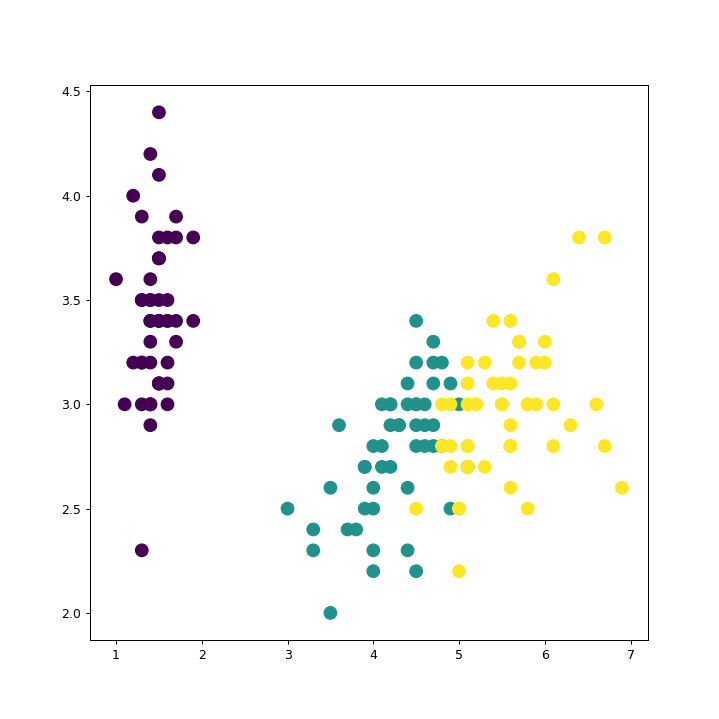

In [16]:
iris = datasets.load_iris()
plt.figure(figsize=(8,8))
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=iris['target'],s=100);

From the plot we can see that the classes from the labels do not form well separated clusters, so it is going to be difficult for hierarchical clustering to discover these three clusters. 

First we apply **single linkage** clustering to the iris dataset

CPU times: user 1.3 ms, sys: 134 µs, total: 1.43 ms
Wall time: 4.02 ms


<IPython.core.display.Javascript object>


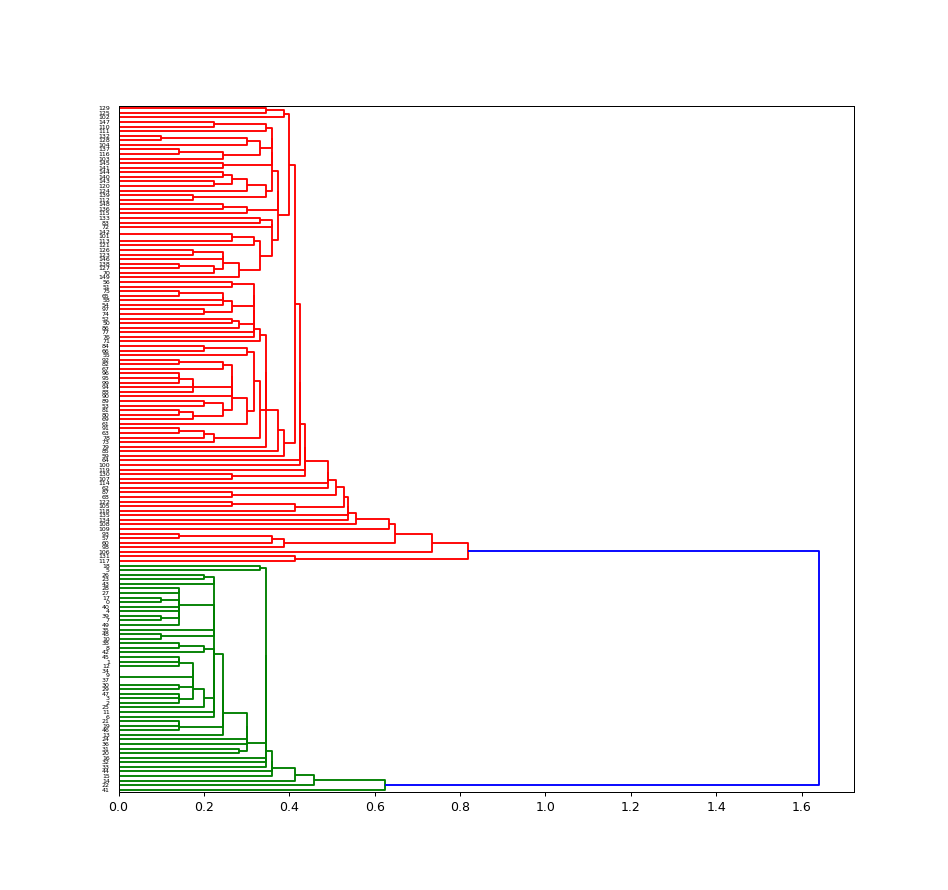

In [17]:
%time clust = linkage(iris['data'], method='single')
plt.figure(figsize=(15,15))
dendrogram(clust, distance_sort=True, orientation='right');

There is only evidence of two distinctive partitions in the dataset, some inversions also appear on the dendrogram. If we cut the dendreogram so we have tree clusters we obtain the following

<IPython.core.display.Javascript object>


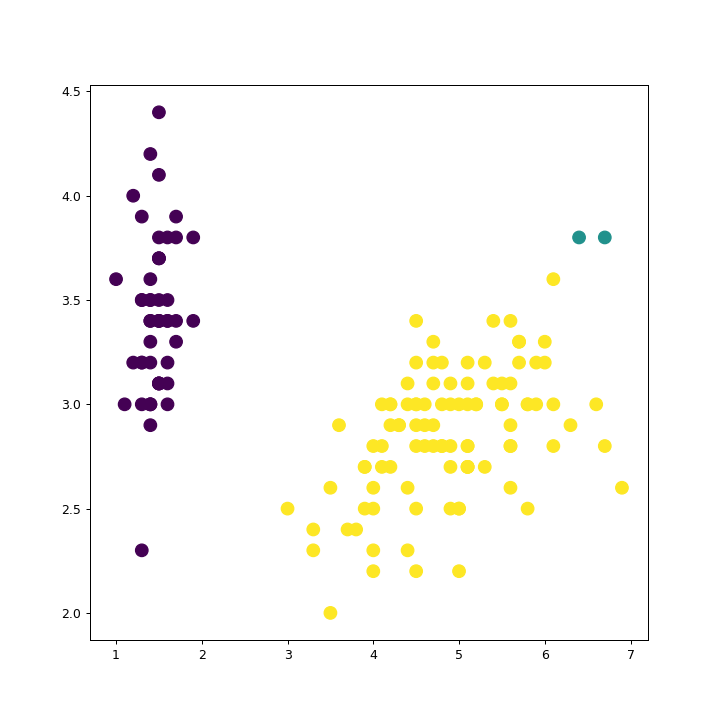

In [18]:
plt.figure(figsize=(8,8))
clabels = fcluster(clust, 3, criterion='maxclust')

plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=clabels ,s=100);

We can compare the true labels with the ones obtained using this clustering algorithm using for example the mutual information score

In [19]:
print("AMI= ", adjusted_mutual_info_score(iris['target'], clabels))

AMI=  0.5820928222202184


Not a very good result

Lets apply the **complete link** criteria to the data.

CPU times: user 1.21 ms, sys: 2.1 ms, total: 3.31 ms
Wall time: 1.14 ms


<IPython.core.display.Javascript object>


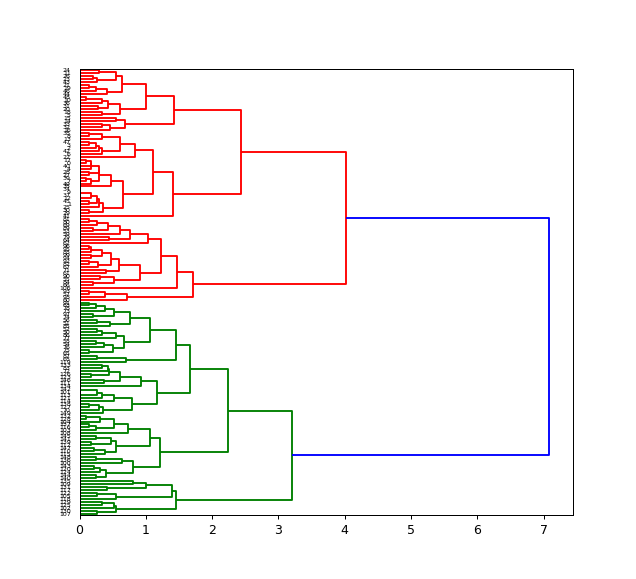

In [20]:
%time clust = linkage(iris['data'], method='complete')
plt.figure(figsize=(15,15))
dendrogram(clust, distance_sort=True, orientation='right');

Also two aparent clusters, but if we cut the dendrogram to three clusters we obtain something a little better.

<IPython.core.display.Javascript object>


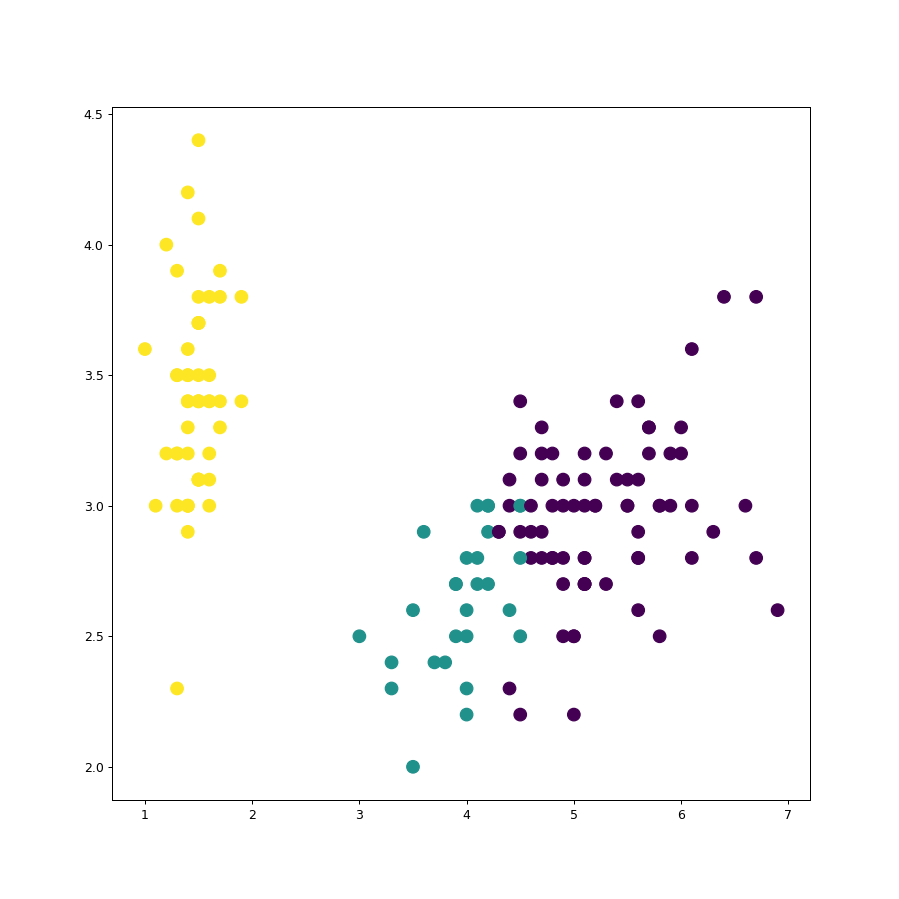

In [21]:
plt.figure(figsize=(10,10))
clabels = fcluster(clust, 3, criterion='maxclust')
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=clabels,s=100);

If we compute the mutual information score

In [22]:
print (adjusted_mutual_info_score(iris['target'], clabels))

0.6963483696671463


Now we use the **average link** criteria to the data.

CPU times: user 44 µs, sys: 1.01 ms, total: 1.05 ms
Wall time: 764 µs


<IPython.core.display.Javascript object>


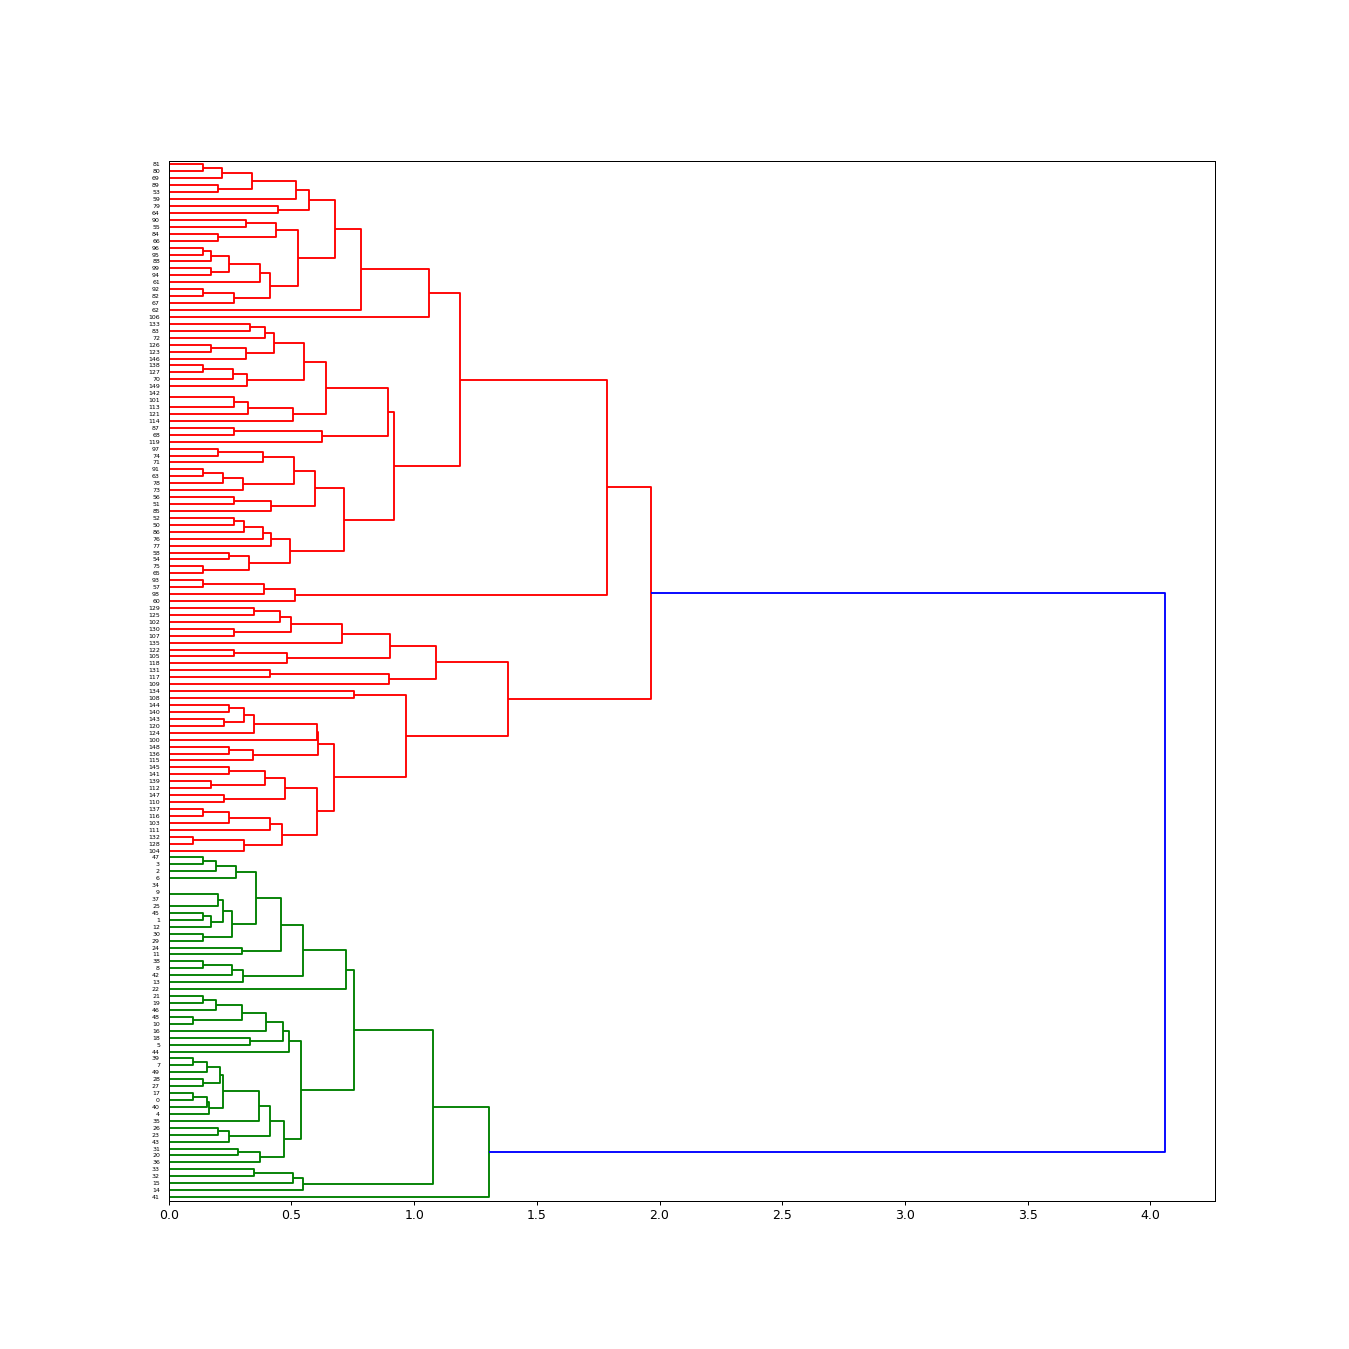

In [23]:
%time clust = linkage(iris['data'], method='average')
plt.figure(figsize=(15,15))
dendrogram(clust, distance_sort=True, orientation='right');

We cut again to obtain three classes

<IPython.core.display.Javascript object>


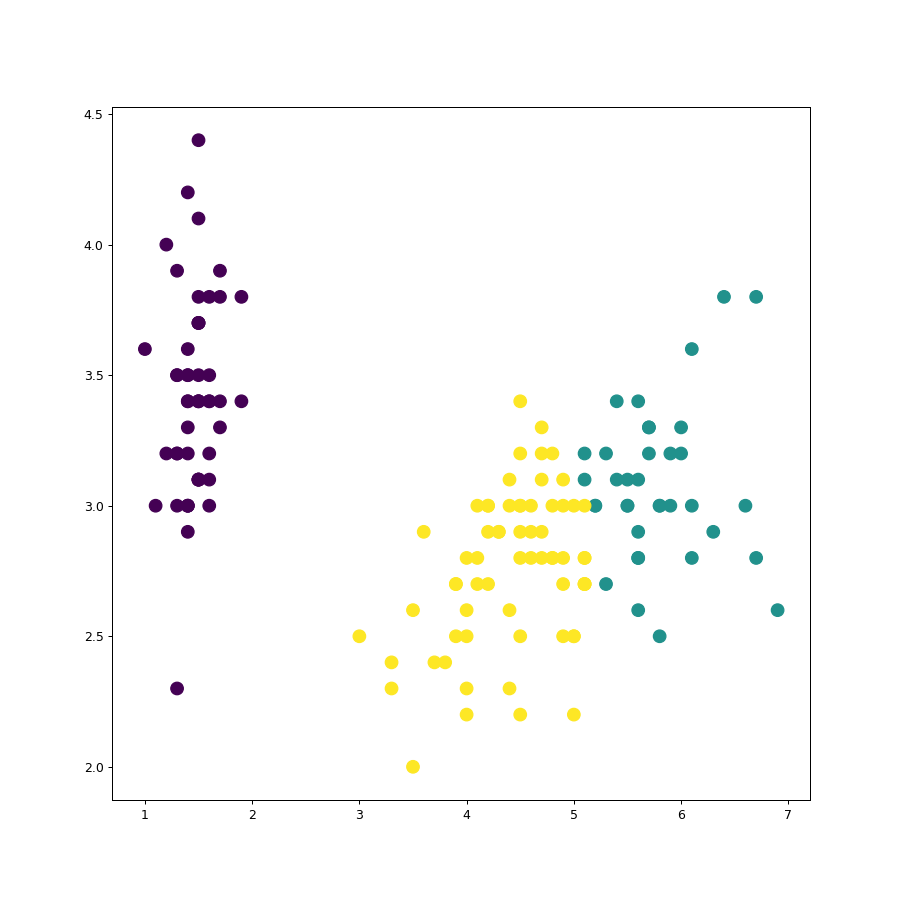

In [24]:
plt.figure(figsize=(10,10))
clabels = fcluster(clust, 3, criterion='maxclust')
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=clabels,s=100);

In this case the mutual information scores higher for this criteria.

In [25]:
print (adjusted_mutual_info_score(iris['target'], clabels))

0.7934250515435666


Now we apply the **Ward criterion** (uses the variances of the clusters)

CPU times: user 1.22 ms, sys: 104 µs, total: 1.33 ms
Wall time: 1.04 ms


<IPython.core.display.Javascript object>


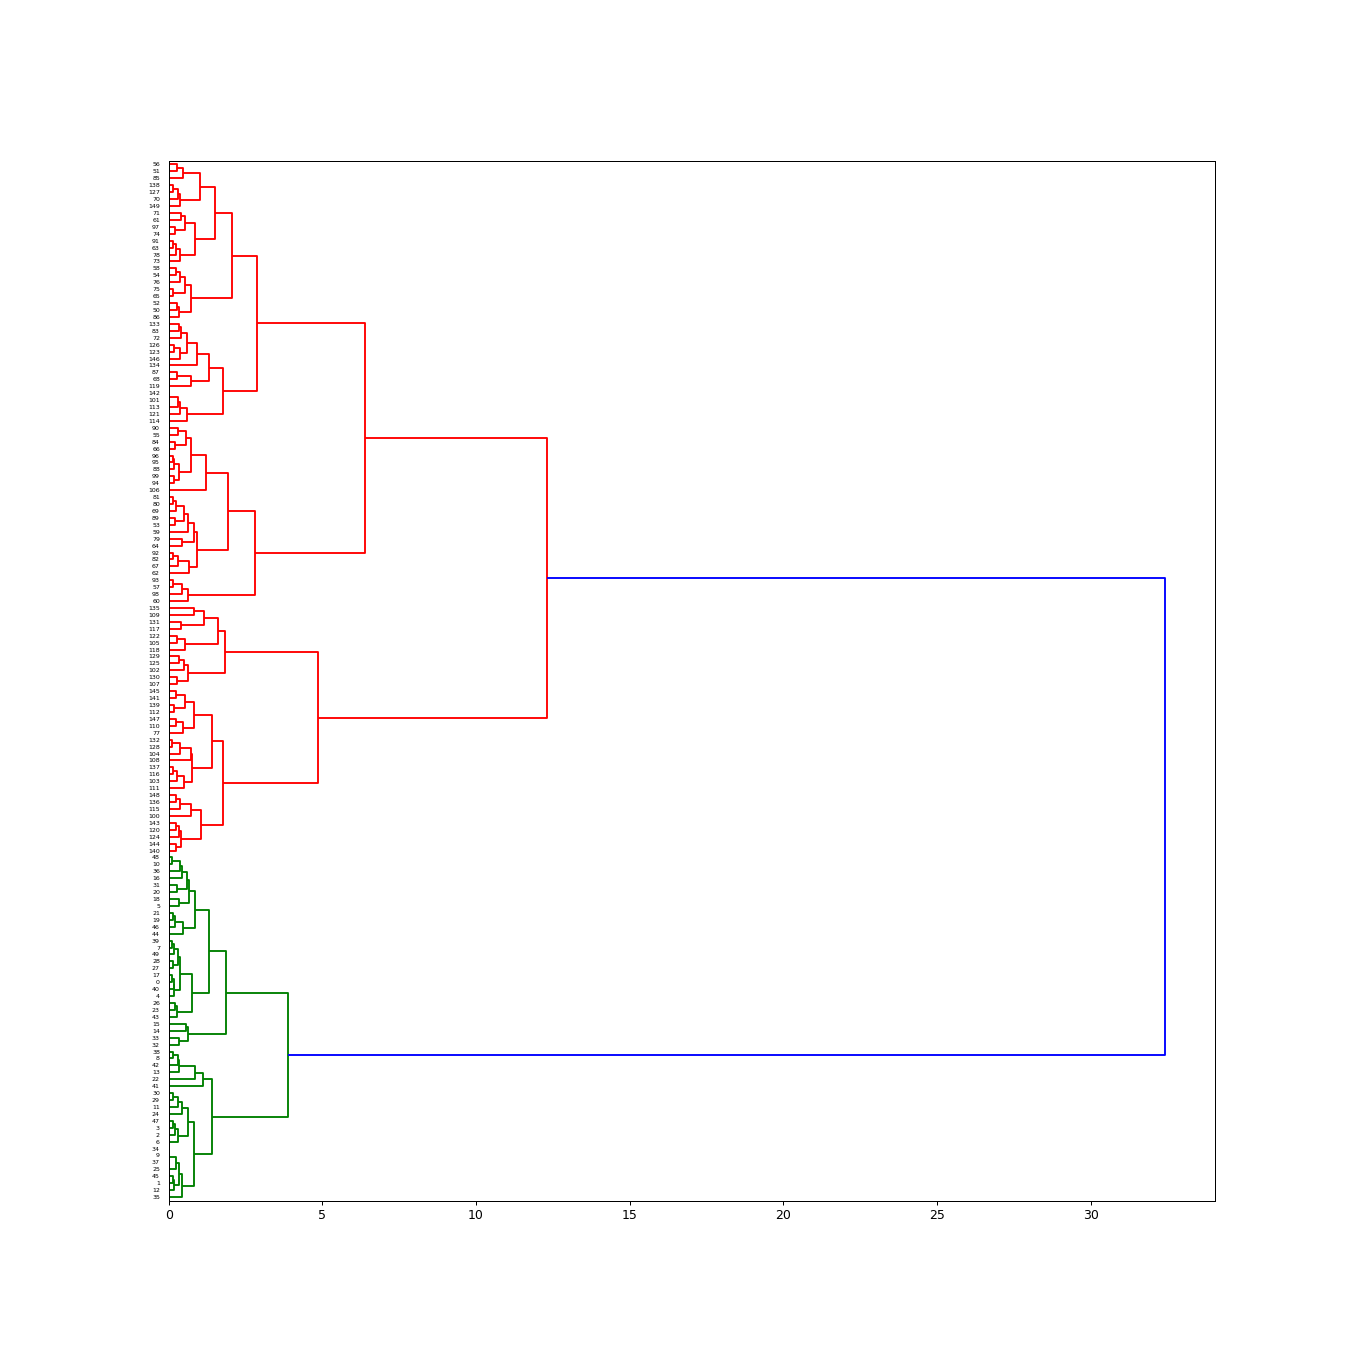

In [26]:
%time clust = linkage(iris['data'], method='ward')
plt.figure(figsize=(15,15))
dendrogram(clust, distance_sort=True, orientation='right');

<IPython.core.display.Javascript object>


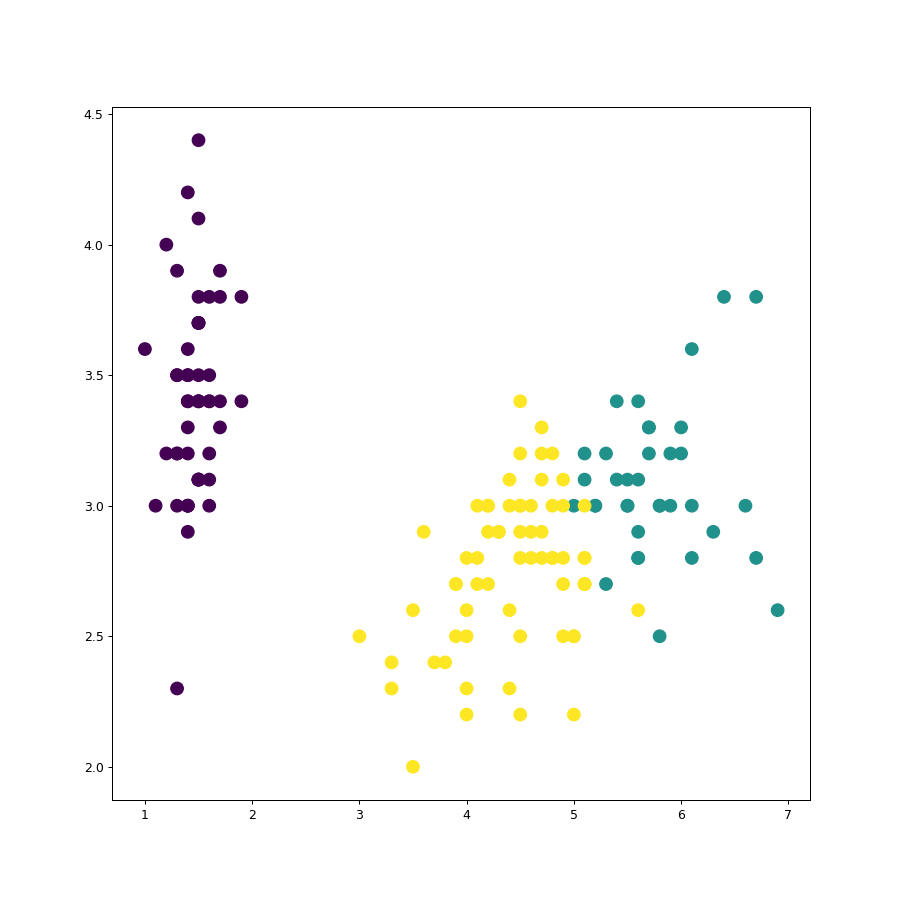

In [27]:
plt.figure(figsize=(10,10))
clabels = fcluster(clust, 3, criterion='maxclust')
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=clabels,s=100);

This criteria scores a little lower than the previous one. As we do not usually have the labels with a real unsupervise dataset we will have to use other quality criteria to decide the method to use for clustering the data.

In [28]:
print (adjusted_mutual_info_score(iris['target'], clabels))

0.7578034225092115
